In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The Iris dataset is a classic dataset in the field of machine learning and statistics. It was introduced by the British biologist and statistician Ronald Fisher in his 1936 paper. The dataset is often used for demonstrating and testing machine learning algorithms.

**Iris Dataset Overview**

The Iris dataset consists of 150 samples of iris flowers from three different species:

Iris setosa
Iris versicolor
Iris virginica
Each sample has four features:

Sepal length (cm)
Sepal width (cm)
Petal length (cm)
Petal width (cm)
The goal is to classify the samples into one of the three species based on these four features.

**What Gets Classified?**

The target variable (the thing that gets classified) in the Iris dataset is the species of the iris flower. Given the measurements of the sepal and petal, the task is to predict which species the flower belongs to.

- Iris setosa (0): This species is one of the easiest to classify because it is usually linearly separable from the other two classes based on the provided features.

- Iris versicolor (1): This species is somewhat more challenging to classify, as its features can overlap with those of Iris virginica.

- Iris virginica (2): This species can also be more challenging to classify correctly due to feature overlap with Iris versicolor.

![Alt text](iris_image.webp)


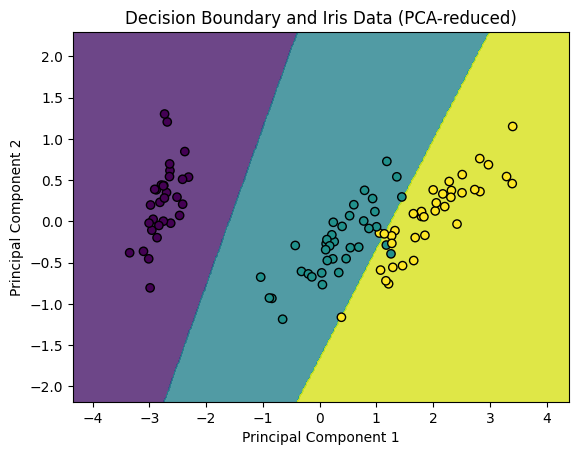

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use PCA to reduce the feature space to 2 dimensions for visualization and model training
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classification model on the PCA-reduced data
model = SVC(kernel='linear')
model.fit(X_train_pca, y_train)

# Visualize the outcome
# Plot the decision boundary
def plot_decision_boundary(model, X, y, pca):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot the original data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary and Iris Data (PCA-reduced)')
    #plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.show()

# Plot the decision boundary for the training data
plot_decision_boundary(model, X_train_pca, y_train, pca)




In [16]:
# Make example predictions
example_data = np.array([[5.0, 3.6, 1.4, 0.2], [6.7, 3.0, 5.0, 1.7], [5.9, 3.0, 5.1, 1.8]])
example_pca = pca.transform(example_data)
predictions = model.predict(example_pca)
print(f"Predictions for {example_data} are {iris.target_names[predictions]}")



Predictions for [[5.  3.6 1.4 0.2]
 [6.7 3.  5.  1.7]
 [5.9 3.  5.1 1.8]] are ['setosa' 'versicolor' 'virginica']



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



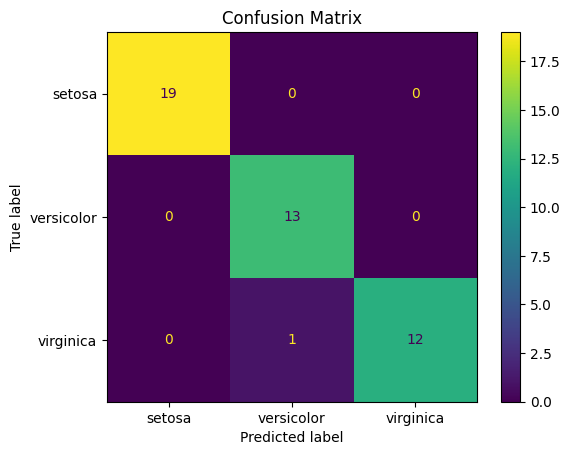

In [17]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test_pca)))

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_pca, y_test, display_labels=iris.target_names)
disp.ax_.set_title("Confusion Matrix")
plt.show()